In [ ]:
## ML IE2
## Yash Athawale 121B1B013
## Aditya Agre 121B1B006
## Vedant Bijwe 121B1B024
## Dataset : https://github.com/adityaagre/Machine-Learning/blob/main/SOCIAL_MEDIA_FAKES.csv

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Load the dataset
data = pd.read_csv("SOCIAL_MEDIA_FAKES.csv")

# Drop the 'isFake' column and rename 'Isfake' to 'target'
#data.drop(columns=['isFake'], inplace=True)
#data.rename(columns={'Isfake': 'target'})

# Separate features and target variable
y = data['Isfake']
X = data.drop(columns=['Isfake'])

## Cross Validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Finding the best k value using elbow method
k_list = []
acc_list = []
for i in range(1, 25, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn_model, X_scaled, y, cv=5)

  k_list.append(k)
  acc_list.append(score)
  print("Accuracy after considering ", k, " neighbours: ", score, np.average(score))

Accuracy after considering  1  neighbours:  [0.92887029 0.92050209 0.94979079 0.92468619 0.80252101] 0.9052740761576598
Accuracy after considering  3  neighbours:  [0.93723849 0.94560669 0.9665272  0.90794979 0.84033613] 0.9195316620371997
Accuracy after considering  5  neighbours:  [0.92887029 0.94560669 0.9665272  0.91213389 0.84453782] 0.9195351780879715
Accuracy after considering  7  neighbours:  [0.93305439 0.94560669 0.9623431  0.91213389 0.83613445] 0.9178545058190639
Accuracy after considering  9  neighbours:  [0.93305439 0.93305439 0.958159   0.90794979 0.82773109] 0.9119897331317464
Accuracy after considering  11  neighbours:  [0.92468619 0.94142259 0.958159   0.93305439 0.82773109] 0.9170106536338384
Accuracy after considering  13  neighbours:  [0.92468619 0.92468619 0.9665272  0.93305439 0.83613445] 0.917017685735382
Accuracy after considering  15  neighbours:  [0.92887029 0.92887029 0.94979079 0.92468619 0.84033613] 0.9145107415351077
Accuracy after considering  17  neighb

In [2]:
## Finding average accuracy across cross validation folds

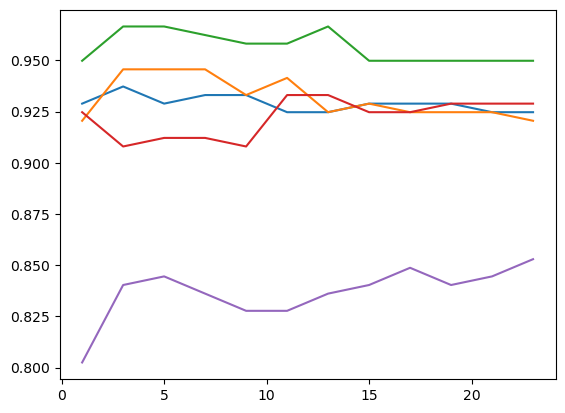

In [3]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(k_list)
ypoints = np.array(acc_list)

plt.plot(xpoints, ypoints)
plt.show()

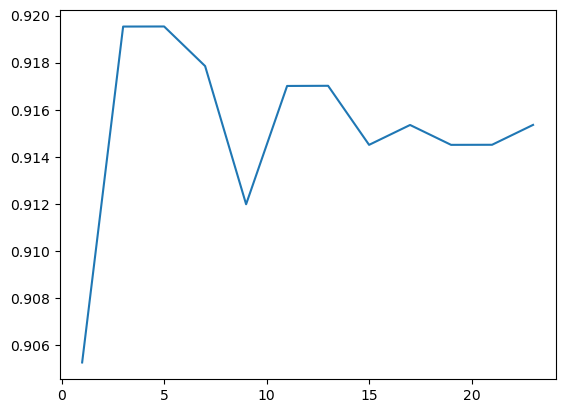

In [4]:
xpoints = np.array(k_list)
ypoints = np.array([np.average(i) for i in acc_list])
plt.plot(xpoints, ypoints)
plt.show()

In [5]:
print(xpoints)
print(ypoints)

[ 1  3  5  7  9 11 13 15 17 19 21 23]
[0.90527408 0.91953166 0.91953518 0.91785451 0.91198973 0.91701065
 0.91701769 0.91451074 0.91535459 0.91451074 0.91451426 0.91535811]


In [6]:
## Therefore best performance is shown by using 2 neighbours.
## Accuracy obtained is 91.79

In [7]:
k = 2
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_scaled, y)
score = cross_val_score(knn_model, X_scaled, y, cv=5)
print(np.average(score)*100)

91.11704933019233


In [ ]:
## Using Logistic regression

# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LogisticRegression
clf = LogisticRegression(random_state=42)
score = cross_val_score(clf, X_scaled, y, cv=5)

print("Logistic Regression model accuracy (in %):", np.average(score)*100)

Logistic Regression model accuracy (in %): 93.79452199289757
